<h2>Preprocessing</h2>

<b>For preprocessing i want to write function</b>

In [67]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(X):
    firstPart = 100*(X[1]-(X[0]**2))**2
    secondPart = (1-X[0])**2
    return firstPart+secondPart

<h2>1) writing gradient and hessian matrix code</h2>

<b>For this part i wrote the gradient and hessian on paper and a function for learning rate i just write the code below here</b>

In [5]:
def Jf(X):
    res = np.array([400*(X[0]**3) - 400*X[0]*X[1]+2*X[0]-2 , 200*(X[1]-(X[0]**2))])
    return res

In [6]:
def Hf(X):
    res = np.array([[1200*(X[0]**2) - 400*X[1] + 2, -400*X[0]] , [-400*X[0] , 200]])
    return res

In [58]:
def learning_rate(X , P):
    minimum_y = f(X)
    a = 0.000000001
    minimum_a = 0
    for i in range(25):
        new_x = np.array([X[0]+a*P[0] , X[1]+a*P[1]])
        y = f(new_x)
        if(y < minimum_y):
            minimum_a = a
            minimum_y = y
        a = a * 2
    return minimum_a

<h2>2) write steepest descent and newton algorithm</h2>

<h3>Steepest descent</h3>

In [74]:
def SteepestDescent(X, X_1 , X_2 , Y):
    treshold = 0.00000001
    while(True):
        P = -Jf(X)
        a = learning_rate(X , P)
        new_x = np.array([X[0]+a*P[0] , X[1]+a*P[1]])
        X_1.append(new_x[0])
        X_2.append(new_x[1])
        Y.append(f(new_x))
        if (abs(f(new_x)-f(X)) < treshold or f(new_x) > f(X)):
            break
        X = new_x
    return new_x

<h2>Newton method</h2>

In [82]:
def Newton(X, X_1 , X_2 , Y):
    treshold = 0.0000001
    while(True):
        P = -np.dot(np.linalg.inv(Hf(X)), Jf(X))
        a = learning_rate(X , P)
        new_x = np.array([X[0]+a*P[0] , X[1]+a*P[1]])
        X_1.append(new_x[0])
        X_2.append(new_x[1])
        Y.append(f(new_x))
        if (abs(f(new_x)-f(X)) < treshold):
            break
        X = new_x
    return new_x

In [83]:
X = np.array([-4, 10])
X1SteepsetDescent = []
X2SteepsetDescent = []
YSteepsetDescent = []
optimum = SteepestDescent(X, X1SteepsetDescent, X2SteepsetDescent, YSteepsetDescent)
print(optimum)
print(f(optimum))

[0.99748371 0.99497029]
6.3329118852414575e-06


In [85]:
X = np.array([-4, 10])
X1Newton = []
X2Newton = []
YNewton = []
optimum = Newton(X, X1Newton, X2Newton, YNewton)
print(optimum)
print(f(optimum))

[0.99832506 0.99663977]
2.822732452145951e-06


<h2>c) a better way</h2>

<b>as you can see newton had a better preformance but did not find the optimum we can do steepest descent and then we do one step newton</b>

In [86]:
def OneStepNewton(X):
    P = -np.dot(np.linalg.inv(Hf(X)), Jf(X))
    new_x = np.array([X[0]+P[0] , X[1]+P[1]])
    return new_x

In [100]:
X = np.array([-4, 10])
optimum = SteepestDescent(X, X1SteepsetDescent, X2SteepsetDescent, YSteepsetDescent)
optimum = OneStepNewton(optimum)
print(optimum)
print(f(optimum))

[0.99999826 0.99999019]
4.000991434776824e-09


<h2>d) plotting</h2>

In [96]:
def dist(X_1 , X_2,X):
    d = []
    for i in range(len(X_1)):
        d.append(math.sqrt(((X_1[i]-X[0])**2)+((X_2[i]-X[1])**2)))
    return d

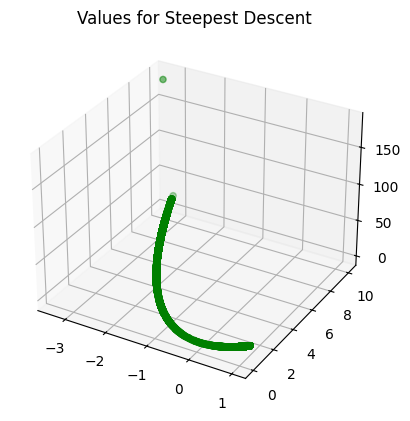

In [90]:
answer = np.array([1,1])
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(X1SteepsetDescent, X2SteepsetDescent, YSteepsetDescent, c = 'green')
ax.set_title('Values for Steepest Descent')
plt.show()

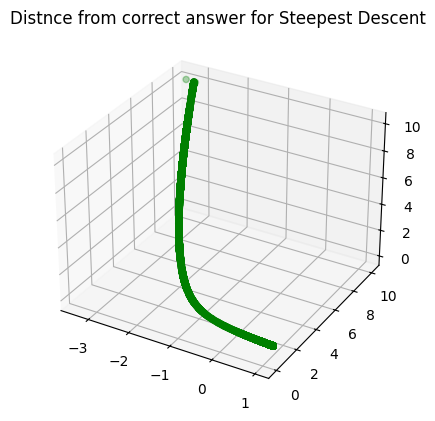

In [98]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
y = dist(X1SteepsetDescent, X2SteepsetDescent , answer)
ax.scatter(X1SteepsetDescent, X2SteepsetDescent, y, c = 'green')
ax.set_title('Distnce from correct answer for Steepest Descent')
plt.show()

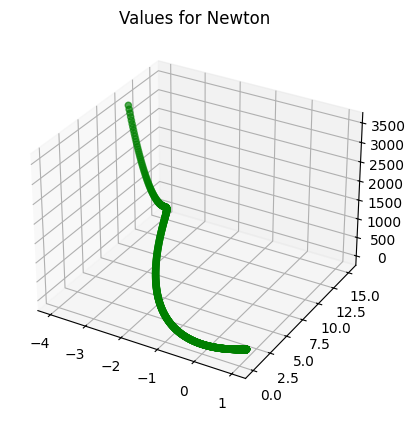

In [91]:
answer = np.array([1,1])
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(X1Newton, X2Newton, YNewton, c = 'green')
ax.set_title('Values for Newton')
plt.show()

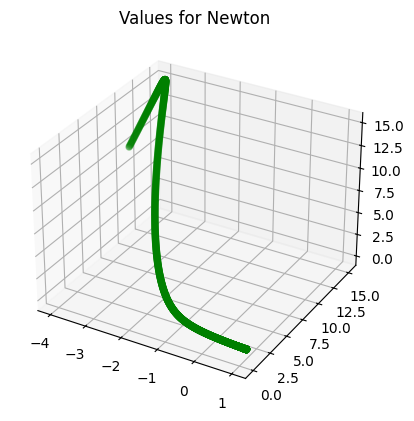

In [99]:
answer = np.array([1,1])
fig = plt.figure()
ax = plt.axes(projection ='3d')
y = dist(X1Newton, X2Newton, answer)
ax.scatter(X1Newton, X2Newton, y, c = 'green')
ax.set_title('Values for Newton')
plt.show()